In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#**Tipos de Análise Exploratória de Dados**

Neste notebook, vamos explorar diferentes tipos de análise exploratória de dados (EDA - Exploratory Data Analysis). A EDA é uma etapa crucial na análise de dados, que nos permite compreender melhor os conjuntos de dados, identificar padrões, tendências e relações entre as variáveis. Vamos abordar os seguintes tipos de análise:

1. Univariada sem gráficos
2. Univariada gráfica
3. Multivariada sem gráficos
4. Multivariada com gráficos

**1. Univariada sem gráficos:**

A análise univariada sem gráficos é uma forma simples de análise de dados que lida com apenas uma variável. O objetivo principal é descrever os dados e identificar padrões dentro deles. Essa análise não leva em consideração causas ou relacionamentos.

Vamos realizar uma análise univariada sem gráficos em nosso conjunto de dados.

In [2]:

url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Verificar o nome das colunas
print(dados.columns)

# Escolher a coluna correta para análise univariada (por exemplo, 'SepalLengthCm')
variavel = dados['SepalLengthCm']
estatisticas_descritivas = variavel.describe()

print(estatisticas_descritivas)



Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64


Neste exemplo, carregamos os dados de um arquivo CSV e selecionamos uma variável específica para análise. Usamos o método describe() para obter estatísticas descritivas dessa variável, como média, desvio padrão, mínimo, máximo e quartis.


**2. Univariada gráfica**

A análise univariada gráfica complementa a análise univariada sem gráficos, fornecendo uma visão mais completa dos dados. Vamos explorar alguns tipos comuns de gráficos para análise univariada:

Tabelas cruzadas: Mostram os valores dos dados e a distribuição.
Histogramas: Gráficos de colunas que representam a frequência ou proporção de casos em intervalos de valores.
Diagramas de caixa: Exibem graficamente os cinco números resumidos (mínimo, primeiro quartil, mediana, terceiro quartil e máximo).
Vamos usar a biblioteca matplotlib para criar gráficos univariados.

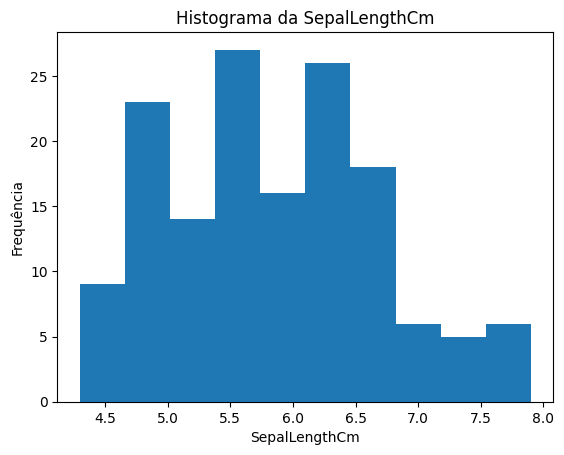

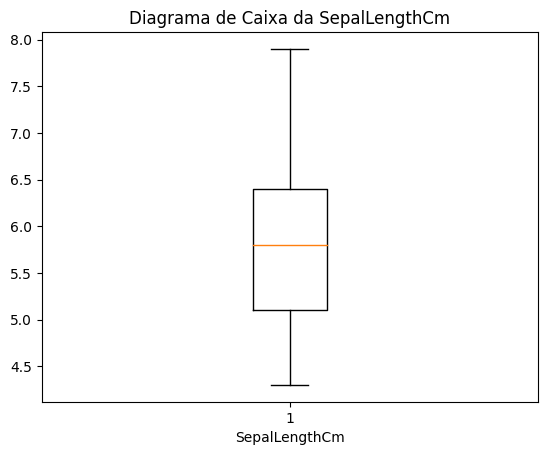

In [3]:

# Carregar o arquivo CSV para o ambiente do Colab
#uploaded = files.upload()

# Obter o nome do arquivo carregado
url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Tabelas cruzadas
tabela_cruzada = pd.crosstab(index=dados['SepalLengthCm'], columns='count')

# Histogramas
plt.hist(dados['SepalLengthCm'], bins=10)
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequência')
plt.title('Histograma da SepalLengthCm')
plt.show()

# Diagrama de caixa
plt.boxplot(dados['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.title('Diagrama de Caixa da SepalLengthCm')
plt.show()



Neste exemplo, usamos a função crosstab do pandas para criar uma tabela cruzada que mostra a contagem dos valores da variável. Em seguida, criamos um histograma e um diagrama de caixa para visualizar a distribuição e os valores discrepantes da variável.

**3. Multivariada sem gráficos**

A análise multivariada lida com conjuntos de dados que envolvem mais de uma variável. Na análise multivariada sem gráficos, exploramos a relação entre duas ou mais variáveis por meio de tabulação cruzada ou estatística.

In [4]:

# Obter o nome do arquivo carregado
url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Verificar as colunas presentes no arquivo
print("Colunas disponíveis:")
print(dados.columns)

# Solicitar ao usuário para escolher as colunas para a análise multivariada
coluna_variavel1 = input("Digite o nome da coluna 'variavel1' (Escolha entre as colunas acima): ")
coluna_variavel2 = input("Digite o nome da coluna 'variavel2' (Escolha entre as colunas acima): ")

# Verificar se as colunas escolhidas existem no conjunto de dados
if coluna_variavel1 in dados.columns and coluna_variavel2 in dados.columns:
    # Análise multivariada sem gráficos - Tabela de frequência cruzada
    relacao_variaveis = pd.crosstab(index=dados[coluna_variavel1], columns=dados[coluna_variavel2])

    # Exibir a tabela de frequência cruzada
    print("Tabela de Frequência Cruzada:")
    print(relacao_variaveis)

    # Salvar a tabela de frequência cruzada em um arquivo CSV
    relacao_variaveis.to_csv('tabela_frequencia_cruzada.csv', index=False)
else:
    print("As colunas escolhidas não existem no conjunto de dados.")


Colunas disponíveis:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Digite o nome da coluna 'variavel1' (Escolha entre as colunas acima): Id
Digite o nome da coluna 'variavel2' (Escolha entre as colunas acima): Id
Tabela de Frequência Cruzada:
Id   1    2    3    4    5    6    7    8    9    10   ...  141  142  143  \
Id                                                     ...                  
1      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
5      0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
146    0    0    0    0    0    0    0    0    0    0  ...    0    

Neste exemplo, usamos a função crosstab do pandas para criar uma tabela cruzada que mostra a relação entre duas variáveis. Também é possível usar o método groupby para agrupar as variáveis e calcular estatísticas resumidas.


**4. Multivariada com gráficos**

A análise multivariada com gráficos nos permite visualizar as relações entre dois ou mais conjuntos de dados. Um gráfico comumente utilizado é o gráfico de colunas agrupadas, onde cada grupo representa um nível de uma variável e cada coluna dentro de um grupo representa os níveis de outra variável.

Colunas disponíveis:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Digite o nome da coluna 'variavel1' (Escolha entre as colunas acima): Id
Digite o nome da coluna 'variavel2' (Escolha entre as colunas acima): Id
Tabela de Frequência Cruzada:
Id   1    2    3    4    5    6    7    8    9    10   ...  141  142  143  \
Id                                                     ...                  
1      1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2      0    1    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    1    0    0    0    0    0    0    0  ...    0    0    0   
4      0    0    0    1    0    0    0    0    0    0  ...    0    0    0   
5      0    0    0    0    1    0    0    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
146    0    0    0    0    0    0    0    0    0    0  ...    0    

<ipython-input-5-84322a7fd348>:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


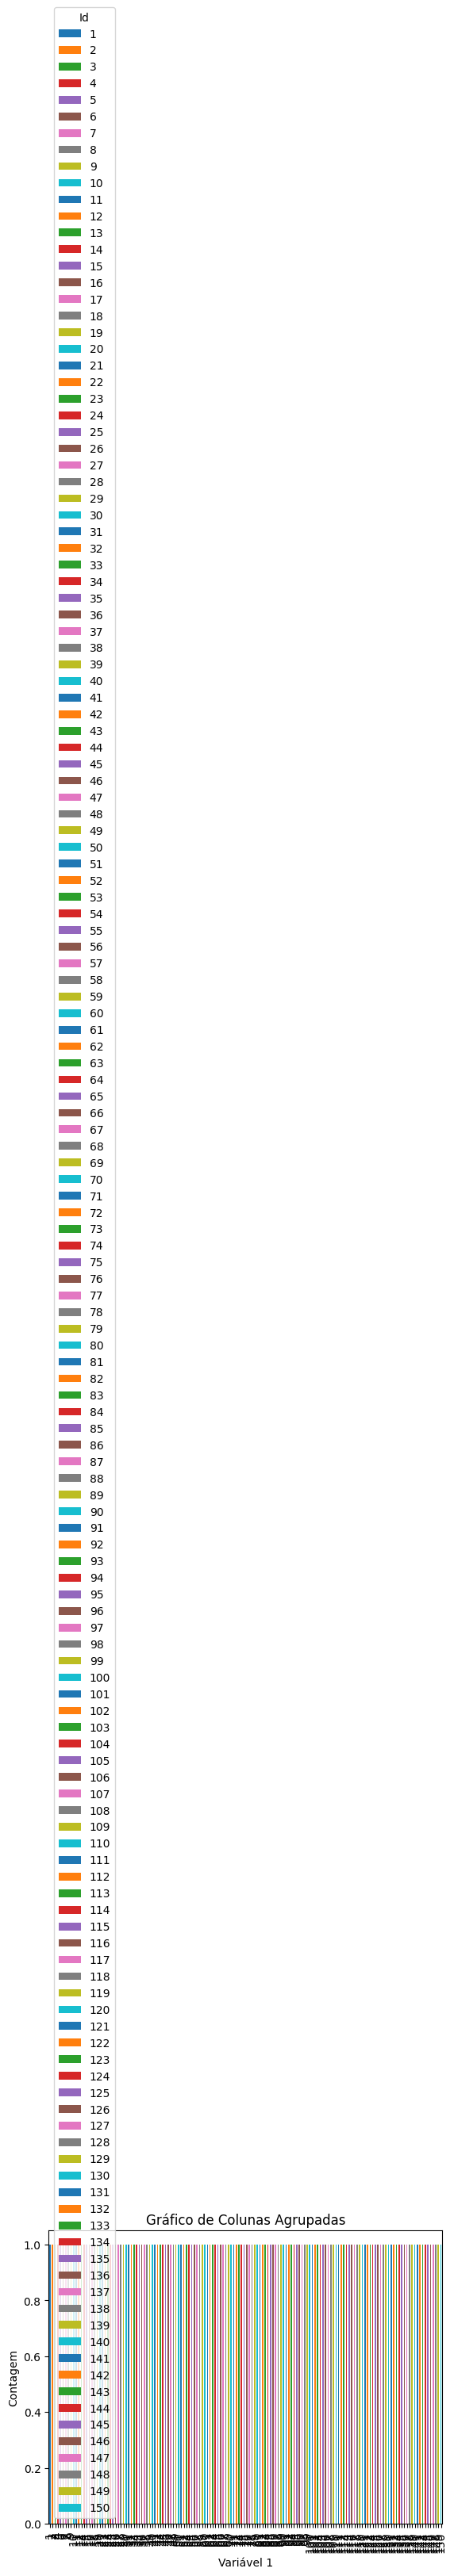

In [5]:

# Obter o nome do arquivo carregado
url_arquivo = "https://huggingface.co/datasets/scikit-learn/iris/raw/main/Iris.csv"

# Carregar os dados
dados = pd.read_csv(url_arquivo)

# Verificar as colunas presentes no arquivo
print("Colunas disponíveis:")
print(dados.columns)

# Solicitar ao usuário para escolher as colunas para a análise multivariada
coluna_variavel1 = input("Digite o nome da coluna 'variavel1' (Escolha entre as colunas acima): ")
coluna_variavel2 = input("Digite o nome da coluna 'variavel2' (Escolha entre as colunas acima): ")

# Verificar se as colunas escolhidas existem no conjunto de dados
if coluna_variavel1 in dados.columns and coluna_variavel2 in dados.columns:
    # Análise multivariada sem gráficos - Tabela de frequência cruzada
    relacao_variaveis = pd.crosstab(index=dados[coluna_variavel1], columns=dados[coluna_variavel2])

    # Exibir a tabela de frequência cruzada
    print("Tabela de Frequência Cruzada:")
    print(relacao_variaveis)

    # Gráfico de colunas agrupadas
    dados_agrupados = dados.groupby([coluna_variavel1, coluna_variavel2]).size().unstack()

    # Criar a figura e os eixos do primeiro gráfico
    fig1, ax1 = plt.subplots()
    dados_agrupados.plot(kind='bar', stacked=True, ax=ax1)

    ax1.set_xlabel('Variável 1')
    ax1.set_ylabel('Contagem')
    ax1.set_title('Gráfico de Colunas Agrupadas')

    # Exibir o primeiro gráfico
    plt.tight_layout()
    plt.show()

    # Salvar a tabela de frequência cruzada e o gráfico em arquivos CSV
    relacao_variaveis.to_csv('tabela_frequencia_cruzada.csv', index=False)
    dados_agrupados.to_csv('grafico_colunas_agrupadas.csv', index=False)
else:
    print("As colunas escolhidas não existem no conjunto de dados.")


Neste exemplo, usamos o método groupby para agrupar as variáveis e criar um gráfico de colunas agrupadas. Isso nos permite visualizar a relação entre as variáveis e comparar os níveis de uma variável com os níveis de outra.

**Importância:**

1. Diversidade de técnicas: Diferentes tipos de análise exploratória usam abordagens variadas, como estatísticas descritivas, gráficos, visualizações, análise de clusters, análise de componentes principais, entre outras. Cada técnica fornece uma perspectiva única dos dados, permitindo uma compreensão mais completa do conjunto de dados.

2. Exploração abrangente: A variedade de técnicas de análise exploratória permite explorar os dados de várias maneiras, revelando padrões ocultos ou tendências que podem não ser evidentes em uma única abordagem.


Em resumo, ter diferentes tipos de análise exploratória de dados é fundamental para obter uma compreensão completa dos dados, detectar padrões importantes e insights valiosos, além de validar suposições iniciais. Essa diversidade de técnicas ajuda a tornar a análise de dados mais abrangente e eficiente, permitindo que os analistas tomem decisões informadas e precisas com base nos dados disponíveis.


#**Bibliografia**

**Livros:**

*   "An Introduction to Statistical Learning" de Gareth James, Daniela Witten, Trevor Hastie, e Robert Tibshirani".

*   "Python for Data Analysis" de Wes McKinney".

**Sites**

*   https://www.ibm.com/br-pt/topics/exploratory-data-analysis